In [ ]:
%pip install tqdm

In [2]:
import matplotlib.pyplot as plt
import pathlib
import numpy as np
from utils import read_im, save_im, normalize
from tqdm import tqdm
output_dir = pathlib.Path("image_solutions")
output_dir.mkdir(exist_ok=True)

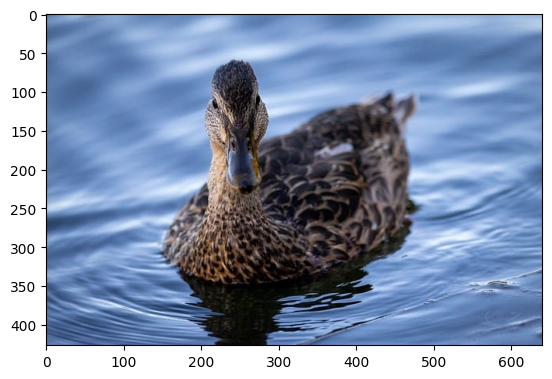

In [3]:
im = read_im(pathlib.Path("images", "duck.jpeg"))
plt.imshow(im)

In [11]:

def convolve_im(im, kernel,
    ):
    """ A function that convolves im with kernel
    
    Args:
        im ([type]): [np.array of shape [H, W, 3]]
        kernel ([type]): [np.array of shape [K, K]]
    
    Returns:
        [type]: [np.array of shape [H, W, 3]. should be same as im]
    """
    assert len(im.shape) == 3
    h, w = len(im), len(im[0])
    new_im = np.zeros_like(im)
    c = len(kernel) // 2
    for i in tqdm(range(len(im))):
        for j in range(len(im[i])):
            p = 0
            i_temp, j_temp = i, j
            for u in range(-c, c+1):
                for v in range(-c, c+1):
                    i_temp = min(max(0, i_temp-u), h-1)
                    j_temp = min(max(0, j_temp-v), w-1)
                    p += kernel[c+u, c+v] * im[i_temp, j_temp]
            new_im[i,j] = p
    return new_im

In [4]:
# Define the convolutional kernels
h_b = 1 / 256  * np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Convolve images
im_smoothed = convolve_im(im.copy(), h_b)
save_im(output_dir.joinpath("im_smoothed.jpg"), im_smoothed)
im_sobel = convolve_im(im, sobel_x)
save_im(output_dir.joinpath("im_sobel.jpg"), im_sobel)

# DO NOT CHANGE. Checking that your function returns as expected
assert isinstance(im_smoothed, np.ndarray),     f"Your convolve function has to return a np.array. " +    f"Was: {type(im_smoothed)}"
assert im_smoothed.shape == im.shape,     f"Expected smoothed im ({im_smoothed.shape}" +     f"to have same shape as im ({im.shape})"
assert im_sobel.shape == im.shape,     f"Expected smoothed im ({im_sobel.shape}" +     f"to have same shape as im ({im.shape})"

100%|██████████| 427/427 [00:09<00:00, 47.37it/s]

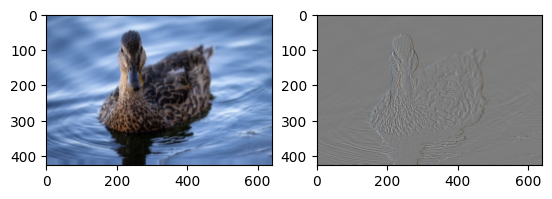

In [5]:
plt.subplot(1, 2, 1)
plt.imshow(normalize(im_smoothed))

plt.subplot(1, 2, 2)
plt.imshow(normalize(im_sobel))
plt.show()